In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
vin = pd.read_excel ("2015-stats-recolte.xls")
vini = vin.dropna()

vini.columns = ["description", "nombre de declarations de recolte et de production souscrites (ha)", "superficie totale des vignes en production (ha)", "A.O.P (ha)", "aptes au Cognac ou Armagnac (ha)", "IGP (ha)", "VSIG (ha)", "A.O.P blanc (hl)", "rouge (hl)", "rosé (hl)", "VSI/VCI (hl)", "I.G.P blanc (hl)", "rouge (hl)", "rosé (hl)", "V.C.I (hl)", "VSIG blanc (hl)", "rouge (hl)", "rosé (hl)", "quantites de vins aptes a la production de Cognac ou d'Armagnac (hl)", "production commercialisable : Volumes AOP, IGP, VSIG et vins aptes (hl)", "production non commercialisable (hl)", "total (hl)"]
vini1 = vini.set_index("description")

vini1


,nombre de declarations de recolte et de production souscrites (ha),superficie totale des vignes en production (ha),A.O.P (ha),aptes au Cognac ou Armagnac (ha),IGP (ha),VSIG (ha),A.O.P blanc (hl),rouge (hl),rosé (hl),VSI/VCI (hl),...,rouge (hl),rosé (hl),V.C.I (hl),VSIG blanc (hl),rouge (hl),rosé (hl),quantites de vins aptes a la production de Cognac ou d'Armagnac (hl),"production commercialisable : Volumes AOP, IGP, VSIG et vins aptes (hl)",production non commercialisable (hl),total (hl)
description,,,,,,,,,,,,,,,,,,,,,
01 AIN,382,758.453,551.84,0,17.2905,189.322,12323,2897.22,12658.4,0,...,79.85,91.05,0,2977.2,1672.51,5846.95,0,38988.9,244.4,39233.3
02 AISNE,804,2441.29,2435.86,0,0,5.4336,164777,0,0,0,...,0,0,0,349.39,7.7,0,0,165134,14343,179477
03 ALLIER,209,647.277,553.28,0,7.9338,86.0631,7394.03,12767,3381.52,0,...,100.34,0,0,547.71,653.24,1580.05,0,26423.8,679.28,27103.1
04 ALPES-HTE-PR,78,674.113,282.281,0,319.488,72.3435,1609.25,5278.29,6582.89,0,...,6129.07,13148,0,212.91,878.61,3714.17,0,40468.1,1264.55,41732.6
05 ALPES-HAUTES,110,115.657,0,0,100.958,14.6991,0,0,0,0,...,1918.99,1055.43,0,88.15,226.35,6.8,0,4174.02,281.51,4455.53
06 ALPES-Mmes,31,85.995,53.8371,0,25.8454,6.3125,580.1,520.62,281.75,0,...,383.57,181.4,0,6.5,60.35,23.7,0,2180.13,64.6,2244.73
07 ARDECHE,1825,10320.9,2665.31,0,7015.14,640.408,9292.78,89773.3,6596.59,429.52,...,185735,116086,0,8600.66,10563.8,1106.96,0,509635,11308.6,520944
08 ARDENNES,2,0.102,0,0,0,0.102,0,0,0,0,...,0,0,0,2.9,2.2,0,0,5.1,0,5.1
09 ARIEGE,42,67.4625,0,0,52.5202,14.9423,0,0,0,0,...,1510.5,376.5,0,16.39,396.74,14.5,0,2493.63,50.73,2544.36


In [76]:
WT = vini1.drop(index = "TOTAUX", columns='total (hl)')

DF_blanc = WT['A.O.P blanc (hl)']

DF_blanc.sort_values(ascending = False)

blanc_max = DF_blanc[DF_blanc > 100000]

blanc_max.shape

blanc_min = DF_blanc.sort_values(ascending = False).iloc[18:79]

blanc_min = blanc_min.sum()

blanc_max = blanc_max.reset_index()

blanc_max.loc[len(blanc_max)]=['AUTRES', blanc_min]

blanc_max.set_index("description")


,A.O.P blanc (hl)
description,
02 AISNE,164777
10 AUBE,479698
11 AUDE,114027
18 CHER,180995
21 COTE D'OR,165485
24 DORDOGNE,177811
26 DROME,126095
33 GIRONDE,556417
34 HERAULT,139724


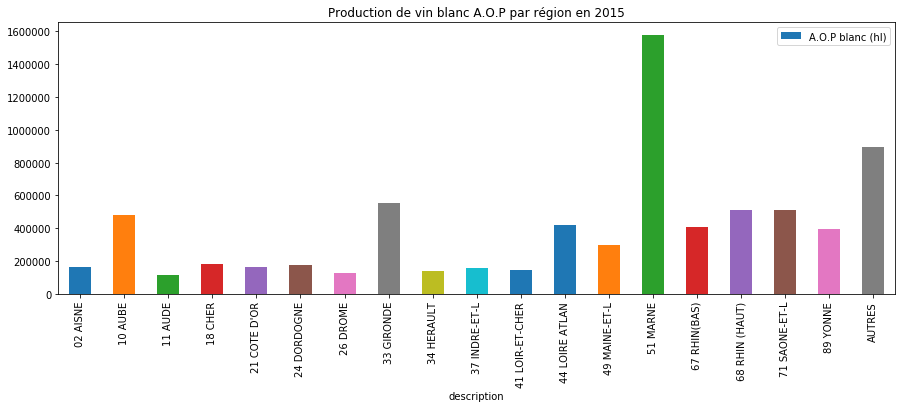

In [77]:
fig, ax = plt.subplots(figsize = (15,5))

blanc_max.plot.bar(x = "description", y='A.O.P blanc (hl)', title = "Production de vin blanc A.O.P par région en 2015", ax=ax)

